In [16]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Dropout, LSTM, Bidirectional, SpatialDropout1D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from google.colab import files
uploaded = files.upload()



Saving HackBase_2020_03.zip to HackBase_2020_03.zip


In [3]:
!unzip HackBase_2020_03.zip

Archive:  HackBase_2020_03.zip
  inflating: HackBase_2020_03.csv    


In [ ]:
ls /content/

HackBase_2020_02.csv  HackBase_2020.csv  HackBase_72.csv
HackBase_2020_02.zip  HackBase_2020.zip  sample_data/


In [4]:
df=pd.read_csv('/content/HackBase_2020_03.csv' , sep=';')

In [32]:
df= df.applymap(lambda s:s.lower() if type(s) == str else s)
categories = {}
CATEGORIES = {}
for key,value in enumerate(df[u'types'].unique()):
    categories[value] = key
    CATEGORIES[key]=value


df['category_code'] = df[u'types'].map(categories)
total_categories = len(df[u'types'].unique())
print('Всего категорий: {}'.format(total_categories))


num_words = 10000
max_comment_len = 30
nb_classes = total_categories

df.head(5)

Всего категорий: 16


,types,base,content,category_code
0,государство,аналитический центр при правительстве российск...,статистика работы портала открытых данных рф,0
1,государство,аналитический центр при правительстве российск...,статистика работы портала открытых данных рф,0
2,государство,аналитический центр при правительстве российск...,статистика работы портала открытых данных рф,0
3,государство,аналитический центр при правительстве российск...,статистика работы портала открытых данных рф,0
4,государство,аналитический центр при правительстве российск...,статистика работы портала открытых данных рф,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122822 entries, 0 to 122821
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   types          122822 non-null  object
 1   base           122822 non-null  object
 2   content        122822 non-null  object
 3   category_code  122822 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.7+ MB


In [33]:
X = df['content']
Y = df['category_code']


In [36]:
 from sklearn.model_selection import train_test_split
 x_train_, x_test_, y_train_, y_test_  = train_test_split(X, Y, test_size=0.2, random_state=1)

In [38]:
y_train = utils.to_categorical(y_train_, nb_classes)
y_test = utils.to_categorical(y_test_, nb_classes)

In [42]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(df['content'])

x_train = pad_sequences(tokenizer.texts_to_sequences(x_train_), maxlen=max_comment_len)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test_), maxlen=max_comment_len)


In [43]:
index = 113550
print(X[index])
print(Y[index])


подведомственные учреждения министерства транспорта дорожного хозяйства и цифрового развития новгородской области
13


In [44]:
print('Размерность x_train:', x_train.shape)
print('Размерность x_test:' , x_test.shape)
print('Размерность y_train:', y_train.shape)
print('Размерность y_test:' , y_test.shape)

Размерность x_train: (98257, 30)
Размерность x_test: (24565, 30)
Размерность y_train: (98257, 16)
Размерность y_test: (24565, 16)


In [45]:
model_lstm_save_path = '3best_model_lstm.h5'

#model_lstm.load_weights(model_lstm_save_path)

model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 128, input_length=max_comment_len))
model_lstm.add(SpatialDropout1D(0.5))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(nb_classes, activation='softmax'))

In [46]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [47]:
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 30, 128)           1280000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 30, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 64)            49408     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
Total params: 1,342,352
Trainable params: 1,342,352
Non-trainable params: 0
_________________________________________________________________


In [49]:

checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [50]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/5
691/691 [==============================] - ETA: 0s - loss: 0.9794 - accuracy: 0.7558
Epoch 00001: val_accuracy improved from -inf to 0.83157, saving model to 3best_model_lstm.h5
691/691 [==============================] - 64s 93ms/step - loss: 0.9794 - accuracy: 0.7558 - val_loss: 0.6119 - val_accuracy: 0.8316
Epoch 2/5
691/691 [==============================] - ETA: 0s - loss: 0.4482 - accuracy: 0.8692
Epoch 00002: val_accuracy improved from 0.83157 to 0.90790, saving model to 3best_model_lstm.h5
691/691 [==============================] - 63s 92ms/step - loss: 0.4482 - accuracy: 0.8692 - val_loss: 0.3175 - val_accuracy: 0.9079
Epoch 3/5
691/691 [==============================] - ETA: 0s - loss: 0.2697 - accuracy: 0.9176
Epoch 00003: val_accuracy improved from 0.90790 to 0.93527, saving model to 3best_model_lstm.h5
691/691 [==============================] - 64s 92ms/step - loss: 0.2697 - accuracy: 0.9176 - val_loss: 0.2224 - val_accuracy: 0.9353
Epoch 4/5
691/691 [============

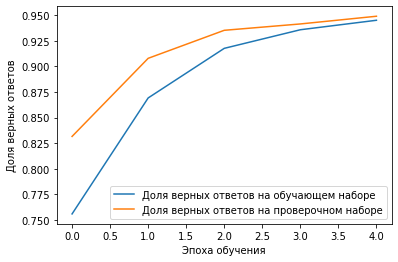

In [51]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [27]:
#model_lstm.load_weights(model_lstm_save_path)


In [52]:
model_lstm.evaluate(x_test, y_test, verbose=1)


768/768 [==============================] - 8s 10ms/step - loss: 0.1611 - accuracy: 0.9476


[0.16108521819114685, 0.9475677013397217]

In [60]:
index = 113550
print(X[index])

text = '''дорожного'''
text_data = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=max_comment_len)
print(text_data)
print(Y[index])

prediction = model_lstm.predict(text_data)
np.argmax(prediction)


подведомственные учреждения министерства транспорта дорожного хозяйства и цифрового развития новгородской области
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0 206]]
13


13

In [61]:
df.loc[[index]]

,types,base,content,category_code
113550,транспорт,департамент транспорта новгородской области,подведомственные учреждения министерства транс...,13
